# 模型评估 (Model Evaluation)

模型评估是衡量机器学习模型性能的关键步骤，不同的任务类型需要不同的评估指标。

## **分类任务 (Classification)**

| 评估指标 | 解释说明 | Sklearn 函数 | 代码示例 |
| :--- | :--- | :--- | :--- |
| **准确率 (Accuracy)** | 正确预测的样本数占总样本数的比例。 | `accuracy_score` | `from sklearn.metrics import accuracy_score`<br>`accuracy = accuracy_score(y_test, y_pred)` |
| **混淆矩阵 (Confusion Matrix)** | 详细展示了真阳性、假阳性、真阴性、假阴性数量，是计算其他分类指标的基础。 | `confusion_matrix` | `from sklearn.metrics import confusion_matrix`<br>`cm = confusion_matrix(y_test, y_pred)` |
| **精确率 (Precision)** | 预测为正例的样本中，真正是正例的比例。 | `precision_score` | `from sklearn.metrics import precision_score`<br>`precision = precision_score(y_test, y_pred)` |
| **召回率 (Recall)** | 所有正例样本中，被正确预测出来的比例。 | `recall_score` | `from sklearn.metrics import recall_score`<br>`recall = recall_score(y_test, y_pred)` |
| **F1-分数 (F1-Score)** | 精确率和召回率的调和平均值，综合考虑了两者的平衡。 | `f1_score` | `from sklearn.metrics import f1_score`<br>`f1 = f1_score(y_test, y_pred)` |
| **分类报告 (Classification Report)** | 一次性输出精确率、召回率、F1-分数和支持数。 | `classification_report` | `from sklearn.metrics import classification_report`<br>`print(classification_report(y_test, y_pred))` |
| **AUC (Area Under Curve)** | ROC 曲线下的面积，用于衡量模型区分正负样本的能力。值越接近 1 越好。 | `roc_auc_score` | `from sklearn.metrics import roc_auc_score`<br>`auc_score = roc_auc_score(y_test, y_scores)` |

---


| 指标 | 二分类 | 多分类 |
| :--- | :--- | :--- |
| **准确率** | 通用，最常用。 | 通用，但对于不平衡数据可能具有误导性。 |
| **精确率、召回率、F1-分数**| 常见，直接计算。 | 通用，但需要注意**微观平均**和**宏观平均**的区别。 |
| **混淆矩阵** | 2x2 矩阵。 | N x N 矩阵，能直观看出每个类别的分类情况。 |
| **AUC/ROC 曲线** | **常用**，用于评估模型区分能力。 | **不适用**，没有直接对应的概念。 |
| **Log-Loss** | 较少用于评估，但可作为损失函数。 | **常用**，用于评估模型的概率预测质量。 |

## **回归任务 (Regression)**

| 评估指标 | 解释说明 | Sklearn 函数 | 代码示例 |
| :--- | :--- | :--- | :--- |
| **均方误差 (Mean Squared Error, MSE)** | 预测值与真实值之差的平方的均值，数值越小越好。 | `mean_squared_error` | `from sklearn.metrics import mean_squared_error`<br>`mse = mean_squared_error(y_test, y_pred)` |
| **平均绝对误差 (Mean Absolute Error, MAE)** | 预测值与真实值之差的绝对值的均值，对异常值不敏感。 | `mean_absolute_error` | `from sklearn.metrics import mean_absolute_error`<br>`mae = mean_absolute_error(y_test, y_pred)` |
| **决定系数 ($R^2$)** | 衡量模型对数据的拟合程度，取值范围通常在 0 到 1 之间，越接近 1 越好。 | `r2_score` | `from sklearn.metrics import r2_score`<br>`r2 = r2_score(y_test, y_pred)` |

---

| 特征 | 单输出回归 (Single-output) | 多输出回归 (Multi-output) |
| :--- | :--- | :--- |
| **预测目标** | 单个连续的数值。 | 多个连续的数值。 |
| **常见任务** | - 预测房价<br>- 预测股票价格<br>- 预测温度 | - 预测物体的三维坐标 ($x, y, z$)<br>- 预测视频中关键点的运动轨迹<br>- 预测多个股票的未来价格 |
| **评估指标** | - **均方误差 (MSE)**<br>- **平均绝对误差 (MAE)**<br>- **决定系数 ($R^2$)**<br>这些指标都是直接计算的。 | - **逐个输出评估:** 分别计算每个输出的 MSE、MAE 等。<br>- **总体平均评估:** 对所有输出的误差取平均值。 |
| **评估原理** | 预测值与真实值之间的差异。 | 预测向量与真实向量之间的差异。 |
| **模型结构** | 通常只包含一个输出神经元或一个输出变量。 | 包含多个输出神经元或多个输出变量。 |

## 交叉检验
| 特性 | `KFold` (非分层) | `StratifiedKFold` (分层) |
| :--- | :--- | :--- |
| **工作原理** | 简单地将数据集分成 $k$ 个大小相等的子集。如果 `shuffle=True`，则在分割前随机打乱。 | 在分割数据集时，**确保每个子集中的类别比例与整个原始数据集的比例相同**。 |
| **主要用途** | 适用于**回归问题**，因为数据没有类别。或用于**分类问题**但类别分布非常均衡。 | 适用于**分类问题**，尤其是**类别不平衡**或数据有顺序的情况。 |
| **优点** | 简单、直接。适用于无类别概念的数据。 | **评估结果更稳健、更可靠**。能有效避免某些类别在测试集中缺失的问题。 |
| **缺点** | 容易受到数据顺序或类别不平衡的影响，可能导致某个折叠的测试集没有某些类别的样本。 | 只适用于分类问题，因为它需要知道数据的类别标签。 |
| **举例** | 100个样本，80个类别A，20个类别B。进行5折。一个折叠的测试集可能只包含类别A。 | 100个样本，80个类别A，20个类别B。进行5折。每个折叠的测试集都包含大约16个类别A和4个类别B。 |
| **`scikit-learn`** <br> **中的默认行为** | `cross_val_score` 在处理回归任务时，默认使用 `KFold`。 | `cross_val_score` 在处理分类任务时，默认使用 `StratifiedKFold`。 |

使用 StratifiedKFold 的交叉验证结果:
---------------------------------------------
平均 accuracy       : 0.9467
平均 f1_weighted    : 0.9464
平均 recall_weighted: 0.9467
预测值:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


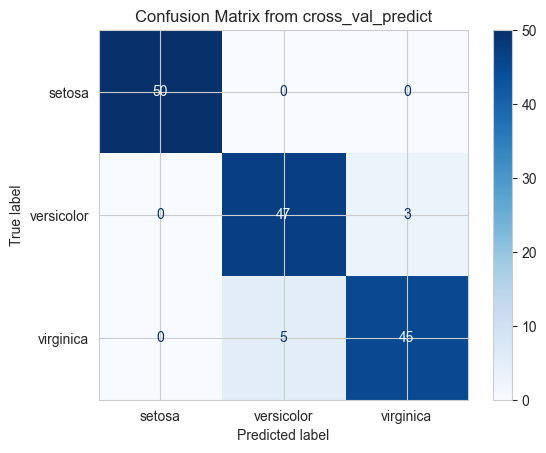

混淆矩阵:
[[50  0  0]
 [ 0 47  3]
 [ 0  5 45]]


In [30]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict,LeaveOneOut
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. 设置随机种子，确保结果可重复
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 2. 加载 Iris 数据集
iris = load_iris()
X = iris.data
y = iris.target

# 3. 定义随机森林模型，并设置随机状态
model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

# 4. 定义要计算的评估指标列表
scoring_metrics = ['accuracy', 'f1_weighted', 'recall_weighted']

# 5. 创建一个分层 K 折交叉验证迭代器
# StratifiedKFold 会确保每个折叠中的类别比例与原始数据集相同
skf = StratifiedKFold(n_splits=5, shuffle=True,random_state=RANDOM_SEED)

# 6. 循环遍历指标列表，分别进行交叉验证
print("使用 StratifiedKFold 的交叉验证结果:")
print("-" * 45)

for metric in scoring_metrics:
    # 将 skf 迭代器对象传入 cv 参数
    scores = cross_val_score(model, X, y, cv=skf, scoring=metric)

    # 打印平均得分
    print(f"平均 {metric:<15}: {np.mean(scores):.4f}")

# 7. 使用 cross_val_predict 获取所有样本的预测值
# cv 参数告诉函数如何划分数据
y_pred = cross_val_predict(model, X, y, cv=skf)
print(f"预测值:")
print(y_pred)
# 8. 生成混淆矩阵并可视化
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix from cross_val_predict')
plt.show()

print("混淆矩阵:")
print(cm)